In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('Admission_Predict.csv')

In [10]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [18]:
df.shape

(400, 9)

In [19]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [20]:
x

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1
396,397,325,107,3,3.0,3.5,9.11,1
397,398,330,116,4,5.0,4.5,9.45,1
398,399,312,103,3,3.5,4.0,8.78,0


In [21]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 4)

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [25]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense 

In [41]:
model = Sequential()

model.add(Dense(7,activation = 'relu',input_dim = 8))
model.add(Dense(7,activation = 'relu'))
model.add(Dense(7,activation = 'relu'))
model.add(Dense(1,activation = 'linear'))

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 7)                 63        
                                                                 
 dense_9 (Dense)             (None, 7)                 56        
                                                                 
 dense_10 (Dense)            (None, 7)                 56        
                                                                 
 dense_11 (Dense)            (None, 1)                 8         
                                                                 
Total params: 183 (732.00 Byte)
Trainable params: 183 (732.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
model.compile(loss = 'mean_squared_error',optimizer = 'Adam')

In [44]:
history = model.fit(x_train_scaled,y_train,epochs = 100,validation_split = 0.1)

Epoch 1/100
9/9 [==============================] - 1s 15ms/step - loss: 0.5438 - val_loss: 0.5401
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5099 - val_loss: 0.5081
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 0.4800 - val_loss: 0.4754
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 0.4441 - val_loss: 0.4334
Epoch 5/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3978 - val_loss: 0.3817
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3418 - val_loss: 0.3210
Epoch 7/100
9/9 [==============================] - 0s 4ms/step - loss: 0.2790 - val_loss: 0.2548
Epoch 8/100
9/9 [==============================] - 0s 4ms/step - loss: 0.2132 - val_loss: 0.1880
Epoch 9/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1492 - val_loss: 0.1258
Epoch 10/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0932 - val_loss: 0.0760
Epoch 11/100
9/9 [==========

9/9 [==============================] - 0s 4ms/step - loss: 0.0042 - val_loss: 0.0049
Epoch 85/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0042 - val_loss: 0.0048
Epoch 86/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0042 - val_loss: 0.0049
Epoch 87/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0041 - val_loss: 0.0048
Epoch 88/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0042 - val_loss: 0.0047
Epoch 89/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0041 - val_loss: 0.0050
Epoch 90/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0041 - val_loss: 0.0047
Epoch 91/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0041 - val_loss: 0.0049
Epoch 92/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0041 - val_loss: 0.0049
Epoch 93/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0041 - val_loss: 0.0047
Epoch 94/100
9/9 [===============

In [45]:
y_pred = model.predict(x_test_scaled)

3/3 [==============================] - 0s 3ms/step


In [46]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.8076578999096808

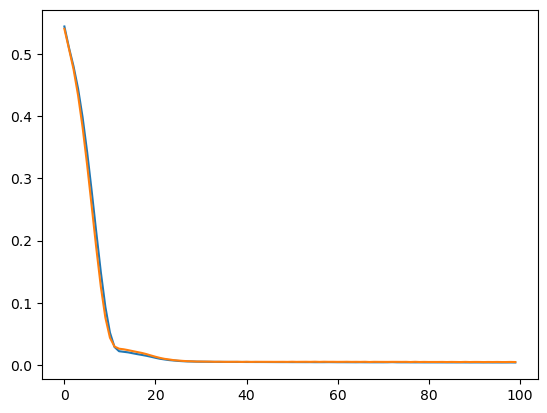

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])